In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

In [ ]:

df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#Handling missing value
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns = categorical_columns, drop_first = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_features = df.select_dtypes(['int64','float64']).columns
scaler =  StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

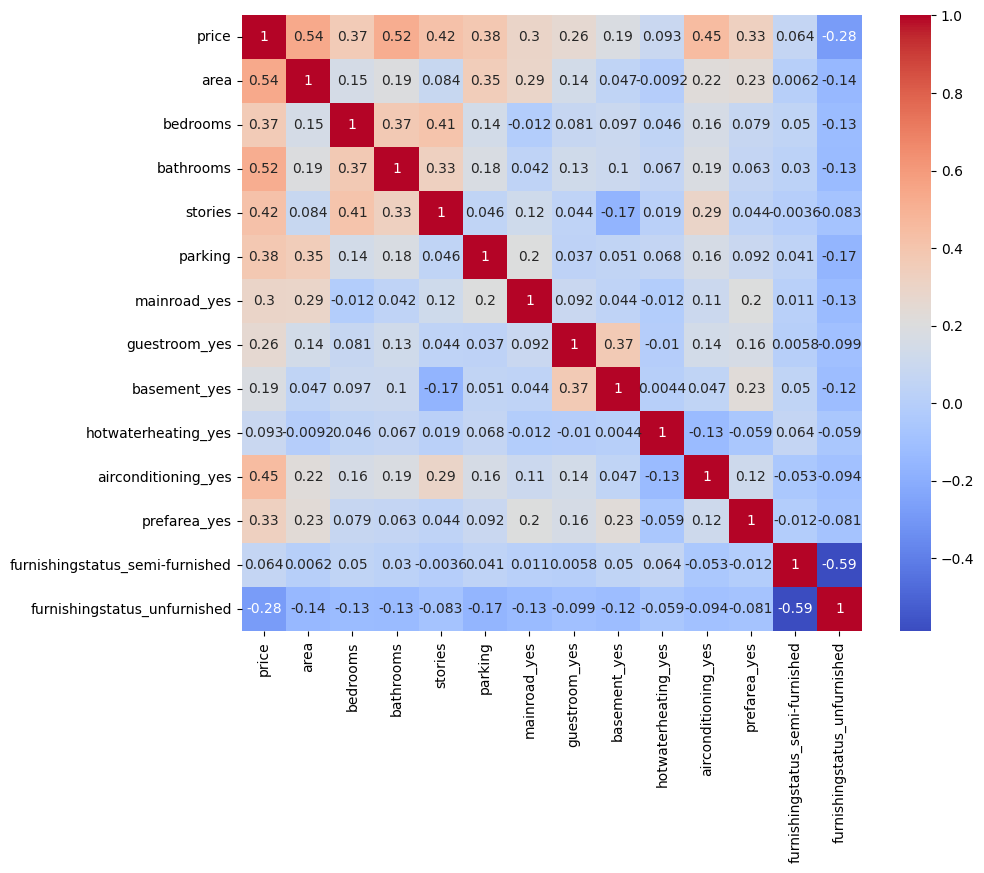

In [ ]:
#correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define your feature set and target variable
X = df[selected_features]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest MAE: 0.6206534124232738
Random Forest R2: 0.4745235460815256


In [ ]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}


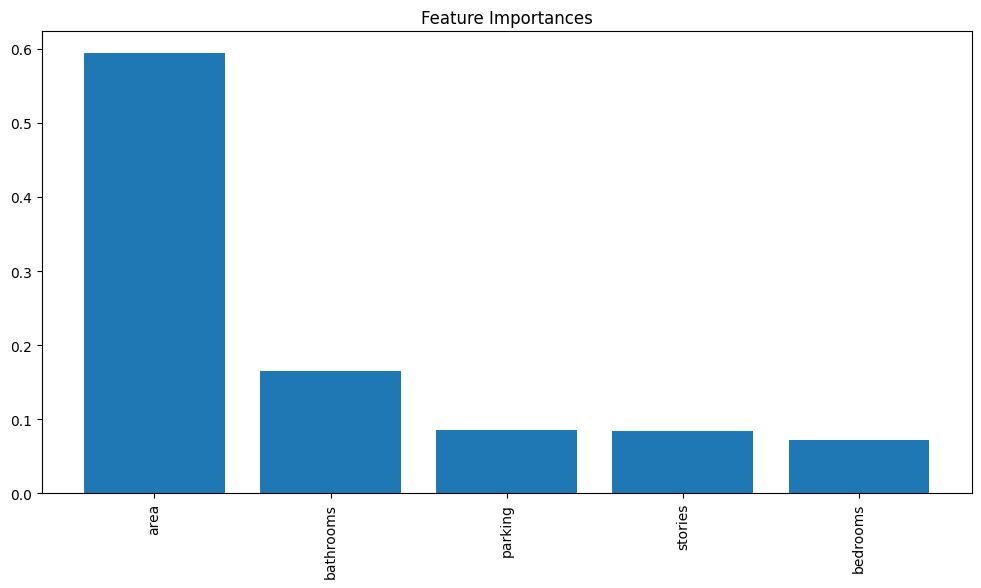

In [ ]:
# Feature importance from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [ ]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Assuming you have trained the model
model = RandomForestRegressor()
model.fit(X_train, y_train)  # Replace with your actual training

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)